$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\piv}{\mathbf{\pi}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Gaussian or Normal Distributions

## First, Why Gaussians?

How would you like to model the probability distribution of a typical cluster of your data?
If, and that's a big if, you believe
the data samples from a particular class have attribute values that
tend to be close to a particular value, that is, that the samples
cluster about a central point in the sample space, then pick a
probabilistic model that has a peak over that central point and falls
towards zero as you move away from that point.

How do we construct such a model?  Well, let's try for two
characteristics:
  - The model's value will decrease with the distance from the central point, and
  - its value will always be greater than 0.
If $\xv$ is a sample and $\muv$ is the central point, we can achieve this with
$$
p(\xv) = \frac{1}{||\xv - \muv||}
$$
where $||\xv - \muv||$ is the distance between $\xv$ and $\muv$.

Let's try making a plot of this for $\mu = 5.5$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

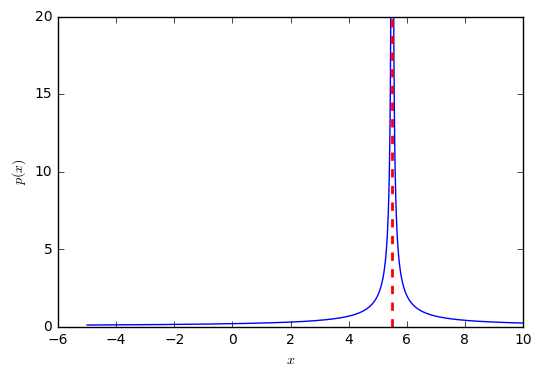

In [2]:
xs = np.linspace(-5,10,1000)
mu = 5.5
plt.plot(xs, 1/np.sqrt((xs-mu)**2))
plt.ylim(0,20)
plt.plot([mu, mu], [0, 20], 'r--',lw=2)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');

The red dotted line is at $\mu = 5.5$.

Humm...meets our criteria, but has problems---goes to infinity at the
center and we cannot control the width of the central area where samples
may appear.

Can take care of first issue by using the distance as an exponent, so
that when it is zero, the result is 1.  Let's try a base of 2.
$$
p(\xv) = \frac{1}{2^{||\xv - \muv||}}
$$

Now, let's see...how do we do a calculation with a scalar base and vector exponent?  For example, we want
$$
2^{[2,3,4]} = [2^2, 2^3, 2^4]
$$

In [3]:
2**[2,3,4]

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'list'

Nope.  Maybe we have to use a numpy array.

In [4]:
2**np.array([2,3,4])

array([ 4,  8, 16])

Hey!  That's it.

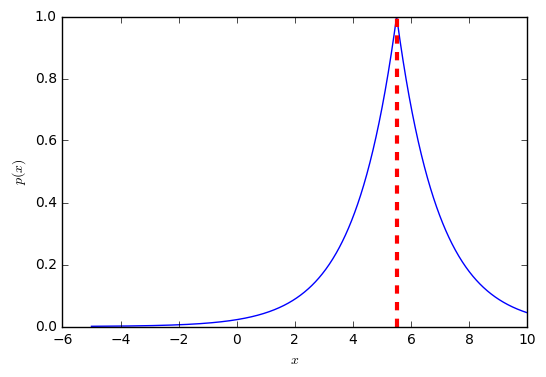

In [5]:
plt.plot(xs, 1/2**np.sqrt((xs-mu)**2))
plt.plot([mu, mu], [0, 1], 'r--',lw=3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');

Solves the infinity problem, but it still falls off too fast.  Want to
change the distance to a function that changes more slowly at first,
when you are close to the center.  How about the square function?  
$$
p(\xv) = \frac{1}{2^{||\xv - \muv||^2}}
$$

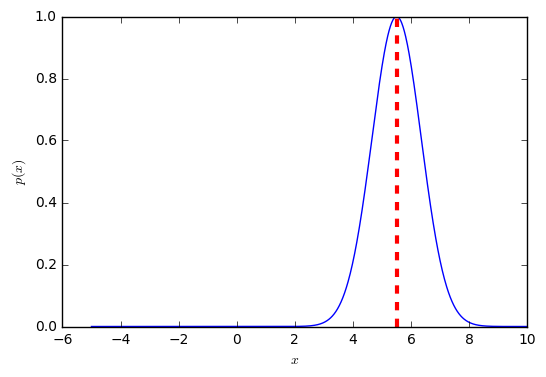

In [6]:
plt.plot(xs, 1/2**(xs-mu)**2)
plt.plot([mu, mu], [0, 1], 'r--',lw=3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');

Yeah. That's a nice shape.  Now we can vary the width by scaling the
squared distance.
$$
p(\xv) = \frac{1}{2^{0.1\,||\xv - \muv||^2}}
$$

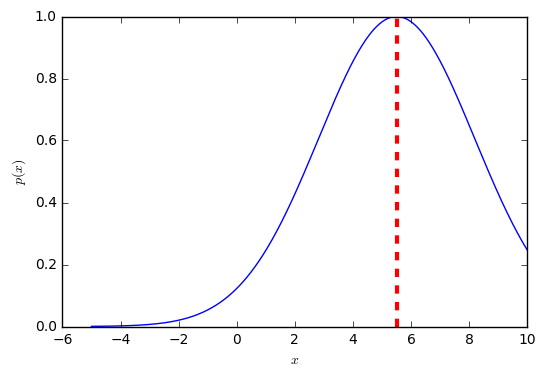

In [7]:
plt.plot(xs, 1/2**(0.1 * (xs-mu)**2))
plt.plot([mu, mu], [0, 1], 'r--',lw=3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');

There. That's good enough.  We could be happy with this.  Just pick
the center and scale factor that best matches the sample
distributions.  But, let's make one more change that won't affect the
shape of our model, but will simplify later calculations.  We will
soon see that logarithms come into play when we try to fit our model
to a bunch of samples.  What is the logarithm of $2^{0.1\,|\xv -
\muv|^2}$, or, more simply, the logarithm of $2^z$?  If we are talking
base 10 logs, $\log 2^z = z \log 2$.  Since we are free to pick the
base...hey, how about using $e$ and using natural logarithms?  Then
$\ln e^z = z \ln e = z$.  So much simpler!  :-)

So, our model is now
$$
p(\xv) = \frac{1}{e^{0.1\,||\xv - \muv||^2}}
$$
which can also be written as
$$
p(\xv) = e^{-0.1\,||\xv - \muv||^2}
$$

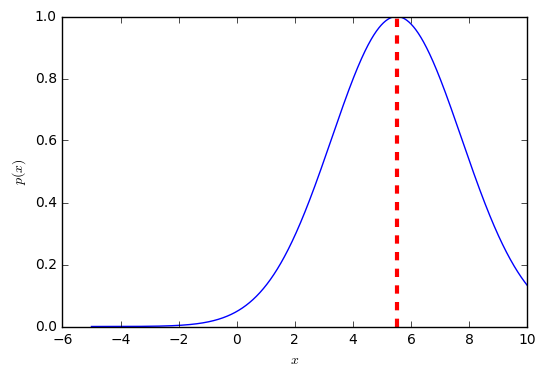

In [8]:
plt.plot(xs, np.exp(-0.1 * (xs-mu)**2))
plt.plot([mu, mu], [0, 1], 'r--',lw=3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');

The scale factor 0.1 is a bit counterintuitive.  The smaller the
value, the more spread out our model is.  So, let's divide by the
scale factor rather than multiply by it, and let's call it $\sigma$.
Let's also put it inside the square function, so $\sigma$ is directly
scaling the distance, rather than the squared distance.  
$$
p(\xv) = e^{-\left (\frac{||\xv - \muv||}{\sigma}\right )^2}
$$
or
$$
p(\xv) = e^{-\frac{||\xv - \muv||^2}{\sigma^2}}
$$

Speaking of dividing, and this won't surprise you, since we will be
taking derivatives of this function with respect to parameters like
$\mu$, let's multiply by $\frac{1}{2}$ so that when we bring the
exponent 2 down it will cancel with $\frac{1}{2}$. 
$$
p(\xv) = e^{-\frac{1}{2}\frac{||\xv - \muv||^2}{\sigma^2}}
$$

One remaining problem we have with our "probabilistic" model is that
it is not a true probability distribution, which must
  - have values between 0 and 1, $0 \le p(x) \le 1$, and
  - have values that sum to 1 over the range of possible $x$ values, $\int_{-\infty}^{+\infty} p(x) dx = 1$.

We have satisfied the first requirement, but not the second.  We can fix
this by calculating the value of the integral and dividing by that
value, which is called the normalizing constant.  The value of the
integral turns out to be $\sqrt{2\pi\sigma^2}$. See [Evolution of the Normal Distribution](https://www.maa.org/sites/default/files/pdf/upload_library/22/Allendoerfer/stahl96.pdf).

So, finally, we have the definition
$$
p(\xv) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2}\frac{||\xv - \muv||^2}{\sigma^2}}
$$
and, TA DA..., we have arrived at the Normal, or Gaussian, probability
distribution (technically the density function) with mean $\muv$ and
standard deviation $\sigma$, and thus variance $\sigma^2$.  Check out
[the Wikipedia entry](http://en.wikipedia.org/wiki/Normal_distribution|the Wikipedia entry).

Now you know a bit about why the Normal distribution is so prevalent. 
For additional insight and history, read [Chapter 7: The Central
Gaussian, or Normal, Distribution](http://omega.albany.edu:8008/ETJ-PS/cc7m.ps) of *Probability Theory:
The Logic of Science* by E.T. Jaynes, 1993.  It starts with this
quotation from Augustus de Morgan (yes, that de Morgan) from 1838:

> "My own impression...is that the mathematical results have outrun
> their interpretation and that some simple explanation of the force and meaning of the 
> celebrated integral...will one day be found...which will at once render useless
> all the works hitherto written."

Before wrestling with python, we need to define the multivariate
Normal distribution.  Let's go to two dimensions, to make sure we develop code to handle multidimensional data, not just scalars.  Now our hill we
have been drawing will be a mound up above a two-dimensional base
plane.  We will define $\xv$ and $\muv$
to be two-dimensional column vectors. What will $\sigma$ be?  Well, we
need scale factors for the two dimensions to stretch or shrink the
mound in the directions of the two base-plane axes.  We also need
another scale factor to allow the mound to be stretched in directions
not parallel to an axis.

Remember, the Normal distribution is all about squared distance from
the mean.  In two dimensions, the difference vector is $\dv = \xv -
\muv = (d_1,d_2)$.  The squared distance is therefore $||\dv||^2 =
d_1^2 + 2 d_1 d_2 + d_2^2$.  Now we see where the three scale factors
go: $s_1 d_1^2 + 2 s_2 d_1 d_2 + s_3 d_2^2$.  This can be written in
matrix form if we collect the scale factors in the matrix
$$
\Sigmav = \begin{bmatrix}
s_1 & s_2\\
s_2 & s_3
\end{bmatrix}
$$
so that 
$$
s_1 d_1^2 + 2 s_2 d_1 d_2 + s_3 d_2^2 = 
\dv^T \Sigmav \dv
$$
because
$$
\begin{align*}
\dv^T \Sigmav \dv
& =
\begin{bmatrix}
d_1 & d_2
\end{bmatrix}
\begin{bmatrix}
s_1 & s_2\\
s_2 & s_3
\end{bmatrix}
\begin{bmatrix}
d_1\\
d_2
\end{bmatrix}\\
& =
\begin{bmatrix}
d_1 s_1 + d_2 s_2 & d_1 s_2 + d_2 s_3
\end{bmatrix}
\begin{bmatrix}
d_1\\
d_2
\end{bmatrix}\\
&=
(d_1 s_1 + d_2 s_2) d_1 + (d_1 s_2 + d_2 s_3) d_2 \\
&=
s_1 d_1^2 + 2 s_2 d_1 d_2 + s_3 d_2^2 
\end{align*}
$$

Again, it is more intuitive to use scale factors that divide the
distance components rather than multiply them.  In the
multidimensional world, this means that instead of multiplying by
$\Sigmav$ we will multiply by $\Sigmav^{-1}$.  

The normalizing constant is a bit more complicated.  It involves the
determinant of $\Sigmav$, which is the sum of its eigenvalues and can
be thought of as a generalized scale factor.  Skim through
[the Wikipedia entry on determinants](http://en.wikipedia.org/wiki/Determinant).  The multivariate $D$-dimensional Normal distribution is
$$
p(\xv) = \frac{1}{(2\pi)^{d/2} |\Sigmav |^{1/2}}
      e^{-\frac{1}{2} (\xv-\muv)^T \Sigmav^{-1} (\xv - \muv)}
$$
where mean $\muv$ is a $D$-dimensional column vector and covariance
matrix $\Sigmav$ is a $D\times D$ symmetric matrix.

The Normal distribution is also called the Gaussian distribution.  (When did Gauss live?)

In addition to the above reasons for concocting this distribution, it has a number of interesting analytical properties.  One is the [Central Limit Theorem](http://en.wikipedia.org/wiki/Central_limit_theorem), which states that the sum of many choices of $N$ random variables tends to a Normal distribution as $N \rightarrow \infty$.

Let's play with this theorem with some fancy shmansy python using the new [ipython notebook *interact* feature](http://nbviewer.ipython.org/github/ipython/ipython-in-depth/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb) to explore the distribution of sums as the number of samples varies.   

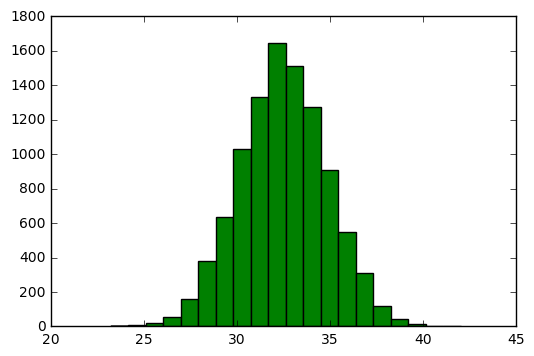

In [9]:
from ipywidgets import interact
maxSamples = 100
nSets = 10000
values = np.random.uniform(0,1,(maxSamples,nSets))

@interact(nSamples=(1,maxSamples))
def sumOfN(nSamples=1):
    sums = np.sum(values[:nSamples,:],axis=0)
    plt.hist(sums, 20, facecolor='green')

Now how would you check our definition of $p(x)$  in python?  First, we need a function to calculate $p(x)$ given $\mu$ and $\Sigma$, or $p(x|\mu, \Sigma)$.

In [ ]:
def normald(X, mu, sigma):
    """ normald:
       X contains samples, one per row, N x D. 
       mu is mean vector, D x 1.
       sigma is covariance matrix, D x D.  """
    D = X.shape[1]
    detSigma = sigma if D == 1 else np.linalg.det(sigma)
    if detSigma == 0:
        raise np.linalg.LinAlgError('normald(): Singular covariance matrix')
    sigmaI = 1.0/sigma if D == 1 else np.linalg.inv(sigma)
    normConstant = 1.0 / np.sqrt((2*np.pi)**D * detSigma)
    diffv = X - mu.T # change column vector mu to be row vector
    return normConstant * np.exp(-0.5 * np.sum(np.dot(diffv, sigmaI) * diffv, axis=1))[:,np.newaxis]

In [ ]:
normald?

Let's check the shapes of matrices in that last calculation.

    diffv = X   -  mu.T
        |  NxD    Dx1 |
        |             |
        |            1xD
        |
       NxD

    normConstant * np.exp(-0.5 * np.sum(np.dot(diffv, sigmaI) * diffv, axis=1))[:,newaxis]
       1x1                                      NxD    DxD  |    NxD |       |           |
                                                            |        |       |           |
                                                           NxD      NxD      |           |
                                                                             |           |
                                                                             N           |
                                                                                        Nx1

So we get $N$ answers, one for each sample.


In [ ]:
np.array([[1,2,3]]).shape

In [ ]:
X = np.array([[1,2],[3,5],[2.1,1.9]])
mu = np.array([[2],[2]])
Sigma = np.array([[1,0],[0,1]])
print(X)
print(mu)
print(Sigma)
normald(X, mu, Sigma)